In [22]:
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment.experiment_utils import wc_experiment
# %matplotlib widget

In [23]:
data_path = "../Data/Water-Clusters"
mol_pair_list_path = os.path.join(data_path, 'list')
_molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
molecule_pairs = []
for nameA, nameB in _molecule_pairs:
    molecule_pairs.append((nameA+'.xyz', nameB+'.xyz'))
otmol_res = wc_experiment(molecule_pairs, data_path, dataset_name = 'ArbAlignDataWC')

The number of candidate center permutations is 2
2-Cs-1.xyz 2-OpenC1.xyz emd 0.32 0.00s
The number of candidate center permutations is 6
3-UUD.xyz 3-UUU.xyz emd 0.31 0.45s
The number of candidate center permutations is 5
4-Ci.xyz 4-S4.xyz emd 0.49 0.46s
The number of candidate center permutations is 35
5-CA-A.xyz 5-CA-B.xyz emd 0.76 0.45s
The number of candidate center permutations is 33
6-BAG.xyz 6-BK-1.xyz emd 1.04 0.45s
The number of candidate center permutations is 39
7-BI1.xyz 7-BI2.xyz emd 0.45 0.46s
The number of candidate center permutations is 60
8-D2d.xyz 8-S4.xyz emd 0.61 0.51s
The number of candidate center permutations is 78
9-D2dDD.xyz 9-S4DA.xyz emd 0.64 0.48s
The number of candidate center permutations is 310
10-PP1.xyz 10-PP2.xyz emd 0.64 0.64s
The number of candidate center permutations is 152
11-551A-1.xyz 11-551A-4.xyz emd 0.14 0.53s
The number of candidate center permutations is 314
12-D2d-1-L.xyz 12-D2d-1-R.xyz emd 0.51 0.64s
The number of candidate center permuta

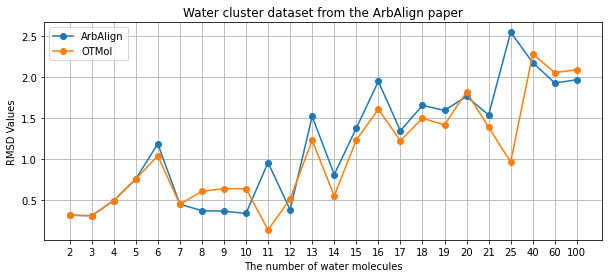

In [24]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), arbalign_res.rename(columns={'RMSD(KM-ByAtomName)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.title("Water cluster dataset from the ArbAlign paper")
plt.xlabel("The number of water molecules") 
plt.ylabel("RMSD Values")
plt.legend()
plt.grid(True)

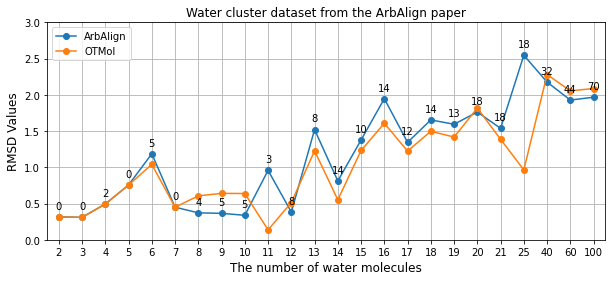

In [25]:
# Read the mismatch data
mismatch_df = pd.read_csv('./ArbAlignOutput/ArbAlignData_mismatch_count.csv')

# Create the plot
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
                        arbalign_res.rename(columns={'RMSD(KM-ByAtomName)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]

plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['#'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                fontsize=10)      # Adjust font size as needed

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 23.5)
plt.title("Water cluster dataset from the ArbAlign paper")
plt.xlabel("The number of water molecules", fontsize=12) 
plt.ylabel("RMSD Values", fontsize=12)
plt.ylim(0, 3)
plt.legend()
plt.grid(True)
plt.savefig('../images/WCArbAlignData.png', dpi=300)

In [26]:
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_res['assignment'][8]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=True)

In [39]:
import numpy as np
data_path1 = "../Data/Water-Clusters"
data_path2 = "./ArbAlignOutput"
nameA = '10-PP1.xyz'
nameB = '10-PP2-aligned_to-10-PP1.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path1, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path2, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(30))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=None, nameA=nameA, nameB=nameB, save=True)

The assignment is not provided. Assuming identity assignment.


Running time comparison

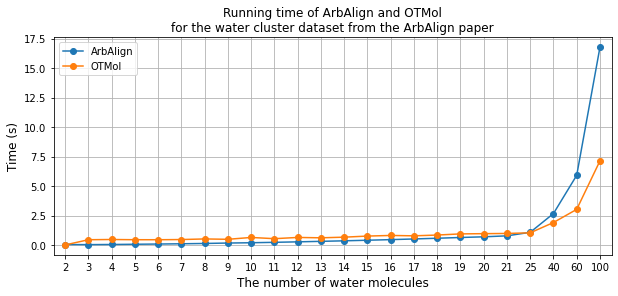

In [27]:
dataset_info = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')[['#']]
arbalign_time = pd.read_csv('./ArbAlignOutput/ArbAlignDataWC_result.csv')[['time']]
otmol_res = pd.read_csv('./otmolOutput/wc_results_ArbAlignDataWC_emd.csv')
combined_df = pd.concat([
    dataset_info,
    arbalign_time.rename(columns={'time': 'ArbAlign'}), 
    otmol_res.rename(columns={'time': 'OTMol'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 23.5)
plt.title("Running time of ArbAlign and OTMol\nfor the water cluster dataset from the ArbAlign paper")
plt.xlabel("The number of water molecules", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('../images/WCArbAlignData_time.png', dpi=300)

1st and 2nd lowest energy

In [28]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_2nd"
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_1st_2nd_lowest_energy.csv')
group1_res = wc_experiment(zip(group1_info['Reference'], group1_info['Target']), group1_data_path, dataset_name = '1st2nd')

The number of candidate center permutations is 6
Wat_3_cluster_0_1st_lowest.xyz Wat_3_cluster_1_2nd_lowest.xyz emd 1.49 0.43s
The number of candidate center permutations is 24
Wat_4_cluster_2_1st_lowest.xyz Wat_4_cluster_3_2nd_lowest.xyz emd 0.95 0.44s
The number of candidate center permutations is 47
Wat_5_cluster_12_1st_lowest.xyz Wat_5_cluster_13_2nd_lowest.xyz emd 0.13 0.45s
The number of candidate center permutations is 10
Wat_6_cluster_31_1st_lowest.xyz Wat_6_cluster_32_2nd_lowest.xyz emd 0.22 0.44s
The number of candidate center permutations is 55
Wat_7_cluster_137_1st_lowest.xyz Wat_7_cluster_138_2nd_lowest.xyz emd 0.78 0.46s
The number of candidate center permutations is 58
Wat_8_cluster_607_1st_lowest.xyz Wat_8_cluster_608_2nd_lowest.xyz emd 0.61 0.47s
The number of candidate center permutations is 62
Wat_9_cluster_1184_1st_lowest.xyz Wat_9_cluster_1185_2nd_lowest.xyz emd 0.58 0.53s
The number of candidate center permutations is 292
Wat_10_cluster_5310_1st_lowest.xyz Wat_10_c

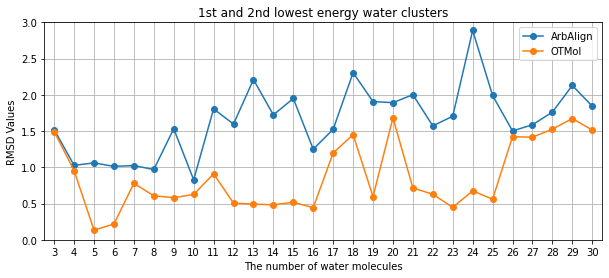

In [29]:
combined_df = pd.concat([group1_res.rename(columns={'RMSD(OTMol)':'OTMol'}), group1_info.rename(columns={'Best_RMSD': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.xlim(-0.5, 27.5)
plt.title("1st and 2nd lowest energy water clusters")
plt.xlabel("The number of water molecules")  
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.legend()
plt.grid(True)

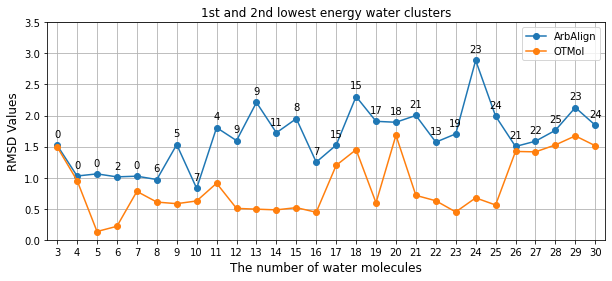

In [30]:
# Read the mismatch data
mismatch_df = pd.read_csv('./ArbAlignOutput/1st2nd_mismatch_count.csv')

# Create the plot
combined_df = pd.concat([group1_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
                        group1_info.rename(columns={'Best_RMSD': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]

plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['Wat_num'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                fontsize=10)      # Adjust font size as needed

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.xlim(-0.5, 27.5)
plt.title("1st and 2nd lowest energy water clusters")
plt.xlabel("The number of water molecules", fontsize=12) 
plt.ylabel("RMSD Values", fontsize=12)
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)
plt.savefig('../images/WC1st2nd.png', dpi=300)

group2

In [31]:
group2_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_to_20th"
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_largest_RMSD_pair_among_20_lowest_energy.csv')
group2_res = wc_experiment(zip(group2_info['Reference'], group2_info['Target']), group2_data_path, dataset_name = 'Largest_RMSD')

The number of candidate center permutations is 6
Wat_3_cluster_0_lowest_1.xyz Wat_3_cluster_1_lowest_2.xyz emd 1.49 0.43s
The number of candidate center permutations is 16
Wat_4_cluster_2_lowest_1.xyz Wat_4_cluster_10_lowest_9.xyz emd 1.39 0.43s
The number of candidate center permutations is 53
Wat_5_cluster_13_lowest_2.xyz Wat_5_cluster_22_lowest_11.xyz emd 0.88 0.46s
The number of candidate center permutations is 31
Wat_6_cluster_42_lowest_12.xyz Wat_6_cluster_50_lowest_20.xyz emd 1.04 0.45s
The number of candidate center permutations is 42
Wat_7_cluster_137_lowest_1.xyz Wat_7_cluster_147_lowest_11.xyz emd 0.82 0.46s
The number of candidate center permutations is 31
Wat_8_cluster_615_lowest_9.xyz Wat_8_cluster_616_lowest_10.xyz emd 0.72 0.45s
The number of candidate center permutations is 84
Wat_9_cluster_1184_lowest_1.xyz Wat_9_cluster_1195_lowest_12.xyz emd 0.77 0.48s
The number of candidate center permutations is 12
Wat_10_cluster_5323_lowest_14.xyz Wat_10_cluster_5324_lowest_15.x

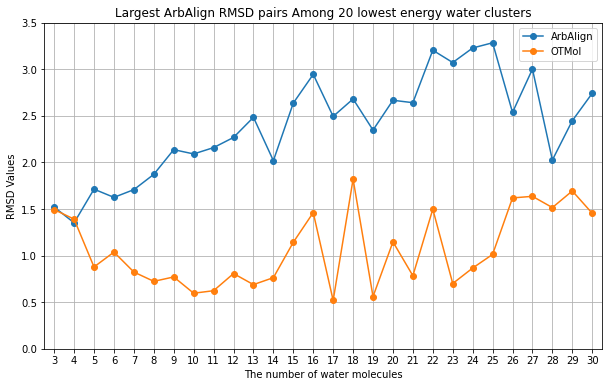

In [32]:
combined_df = pd.concat([
    group2_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    group2_info.rename(columns={'Best_RMSD': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.xlim(-0.5, 27.5)
plt.title("Largest ArbAlign RMSD pairs Among 20 lowest energy water clusters")
plt.xlabel("The number of water molecules")  
plt.ylabel("RMSD Values")
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)

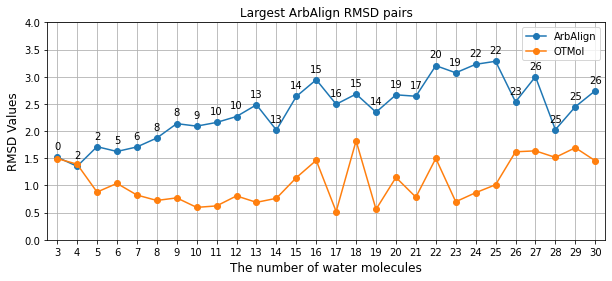

In [33]:
# Read the mismatch data
mismatch_df = pd.read_csv('./ArbAlignOutput/largestRMSD_mismatch_count.csv')

# Create the plot
combined_df = pd.concat([group2_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
                        group2_info.rename(columns={'Best_RMSD': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]

plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['Wat_num'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                fontsize=10)      # Adjust font size as needed

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.xlim(-0.5, 27.5)
plt.title("Largest ArbAlign RMSD pairs")
plt.xlabel("The number of water molecules", fontsize=12) 
plt.ylabel("RMSD Values", fontsize=12)
plt.ylim(0, 4)
plt.legend()
plt.grid(True)
plt.savefig('../images/WClargestRMSD.png', dpi=300)

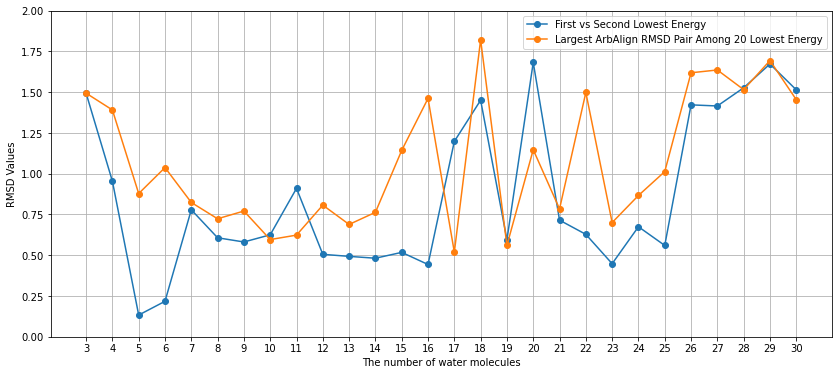

In [34]:
combined_df = pd.concat([
    group1_info, group1_res.rename(columns={'RMSD(OTMol)': 'First vs Second Lowest Energy'}), 
    group2_res.rename(columns={'RMSD(OTMol)': 'Largest ArbAlign RMSD Pair Among 20 Lowest Energy'})], axis=1)
columns_to_plot = ["First vs Second Lowest Energy", "Largest ArbAlign RMSD Pair Among 20 Lowest Energy"]
plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
#plt.title("RMSD Comparison, WC Benchmark 1st to 20th")
plt.xlabel("The number of water molecules")  
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.legend()
plt.grid(True)

Comparison with the method that aligns oxygens first

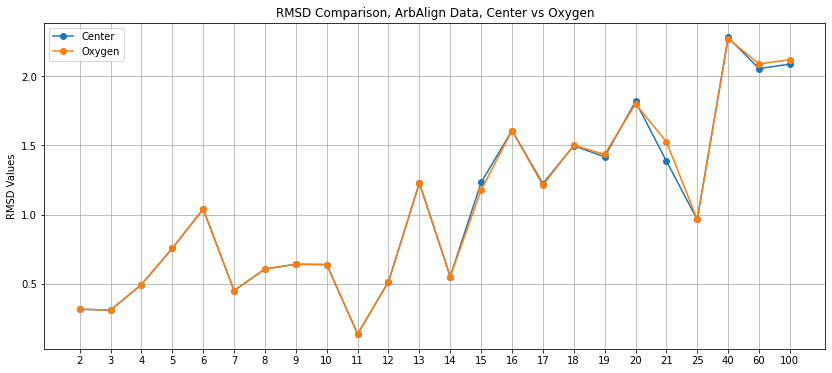

In [35]:
old_arbalign_data_res = pd.read_csv('./otmolOutput/old_ArbAlignData_res.csv')
combined_df = pd.concat([arbalign_res,otmol_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_arbalign_data_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.title("RMSD Comparison, ArbAlign Data, Center vs Oxygen")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.legend()
plt.grid(True)

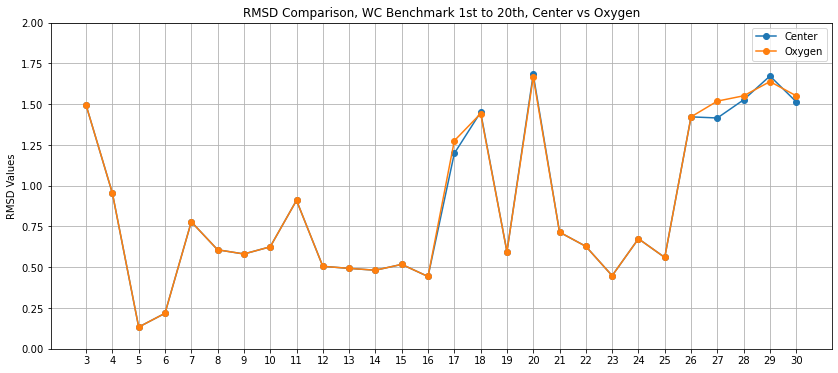

In [36]:
old_group1_res = pd.read_csv('./otmolOutput/old_group1_res.csv')
combined_df = pd.concat([group1_info,group1_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_group1_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, WC Benchmark 1st to 20th, Center vs Oxygen")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.legend()
plt.grid(True)

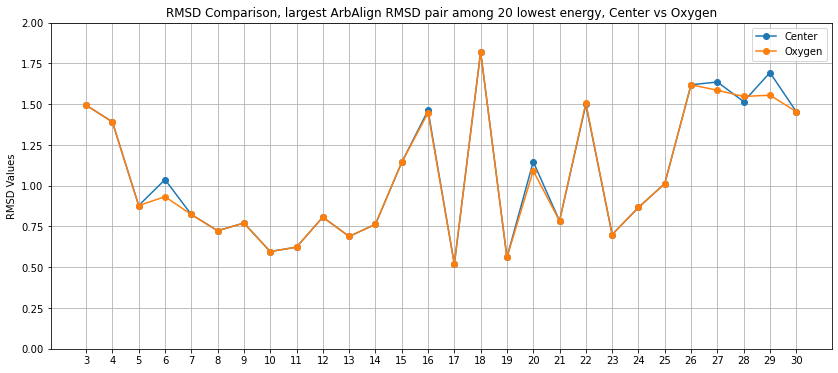

In [37]:
old_group2_res = pd.read_csv('./otmolOutput/old_group2_res.csv')
combined_df = pd.concat([group2_info,group2_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_group2_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, largest ArbAlign RMSD pair among 20 lowest energy, Center vs Oxygen")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.legend()
plt.grid(True)